In [13]:
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from get_data import split_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set random seed
seed = 42

In [14]:
X = pd.read_csv('rhs_regression_dataset.csv')
y = X.pop('max ultimate height')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=seed)

In [15]:
# Normalise data
scaler = preprocessing.StandardScaler()
X_train_scaler= scaler.fit(X_train)
X_scaled = X_train_scaler.transform(X_train)

In [16]:
# Fit model
linear_regression_model = LinearRegression(normalize=True)
linear_regression_model.fit(X_train, y_train)

intercept = linear_regression_model.intercept_ # scalar (bias)
print(f'intercept: {intercept}')
coefficient = linear_regression_model.coef_ # array (weights)
print(f'coefficients: {coefficient}')

# Check cross validation score on TRAINING set
lin_reg_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=10)
print(f'cross validation scores: {lin_reg_scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (lin_reg_scores.mean(), lin_reg_scores.std()))

y_pred = linear_regression_model.predict(X)
print(f'predicted values: {y_pred}')

intercept: 0.3174313984604282
coefficients: [ 0.84891818 -0.39056198  0.6814394  -0.00662977  0.00492183]
cross validation scores: [0.93211118 0.95823971 0.91782921 0.93000995 0.94281591 0.94680839
 0.9079411  0.94636185 0.91660568 0.9517921 ]
0.94 accuracy with a standard deviation of 0.02
predicted values: [ 2.74070312 14.50721297 14.30831997 ...  2.08831669  4.20514896
  1.23939851]


The mean squared error is 1.02


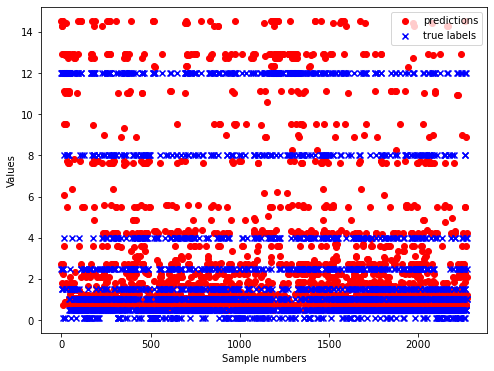

In [17]:
# Mean squared error score
def mse_score(y_pred, y):
    mse_score = round(mean_squared_error(y, y_pred, squared=True),2)
    print(f'The mean squared error is {mse_score}')
mse_score(y_pred, y)

def calculate_loss(y_pred, y):
    return np.mean((y_pred - y) ** 2)

# Plot predictions with true labels
def plot_predictions(y_pred, y):
    samples = len(y_pred)
    plt.figure(figsize=(8,6))
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()
    
calculate_loss(y_pred, y)
plot_predictions(y_pred, y)

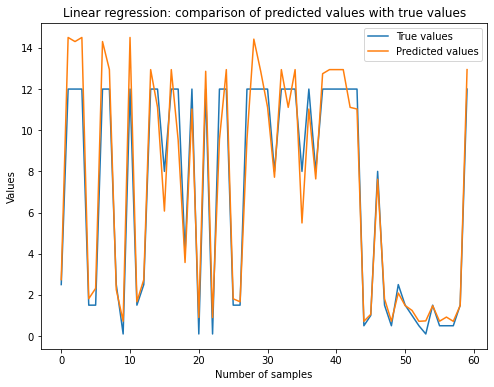

In [18]:
def plot_linear_model(y_pred, y):
    sample_y_pred = y_pred[:60]
    sample_y = y[:60]
    plt.figure(figsize=(8,6))
    plt.plot(sample_y, label='True values')
    plt.plot(sample_y_pred, label='Predicted values')
    plt.xlabel('Number of samples')
    plt.ylabel('Values')
    plt.legend(prop=dict(size=10))
    plt.title('Linear regression: comparison of predicted values with true values')
plot_linear_model(y_pred, y)

In [19]:
from sklearn.linear_model import BayesianRidge

bayesian_model = BayesianRidge(compute_score=True)
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X)
print(f'Predicted values: {bayesian_y_pred}')

Predicted values: [ 2.74430663 14.4698216  14.27800828 ...  2.08545348  4.20096172
  1.24004532]


In [20]:
# Check cross validation score on TRAINING set
bayesian_scores = cross_val_score(bayesian_model, X_train, y_train, cv=10)
print('Bayesian regression cross validation scores:', bayesian_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (bayesian_scores.mean(), bayesian_scores.std()))
mse_score(bayesian_y_pred, y)

Bayesian regression cross validation scores: [0.93203996 0.95778244 0.91847728 0.93026531 0.94245667 0.94661101
 0.90773969 0.94590743 0.91730815 0.95158197]
0.94 accuracy with a standard deviation of 0.02
The mean squared error is 1.02


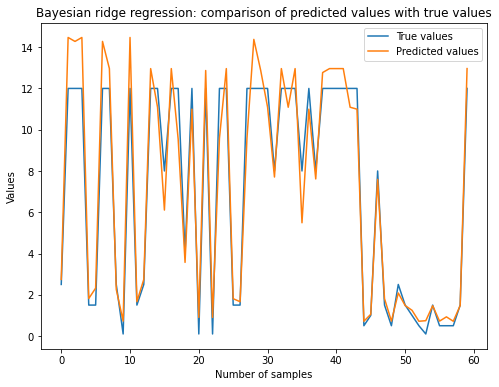

In [21]:
def plot_bayesian_model(y_pred, y): 
    plt.figure(figsize=(8,6))
    plt.plot(y[:60], label='True values')
    plt.plot(y_pred[:60], label='Predicted values')
    plt.xlabel('Number of samples')
    plt.ylabel('Values')
    plt.legend(prop=dict(size=10))
    plt.title('Bayesian ridge regression: comparison of predicted values with true values')
    plt.show()
plot_bayesian_model(bayesian_y_pred, y)


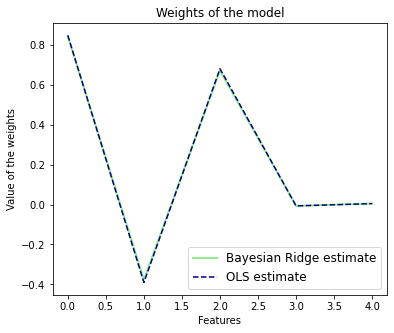

In [22]:
def plot_weights(bayesian_model_weights, linear_regression_model_weights):
    lw = 2
    plt.figure(figsize=(6, 5))
    plt.title("Weights of the model")
    plt.plot(bayesian_model.coef_, color='lightgreen', linewidth=lw, label='Bayesian Ridge estimate')
    plt.plot(linear_regression_model.coef_, color='navy', linestyle='--', label='OLS estimate')
    plt.xlabel('Features')
    plt.ylabel('Value of the weights')
    plt.legend(loc='best', prop=dict(size=12))
    plt.show()
plot_weights(bayesian_model.coef_, linear_regression_model.coef_)

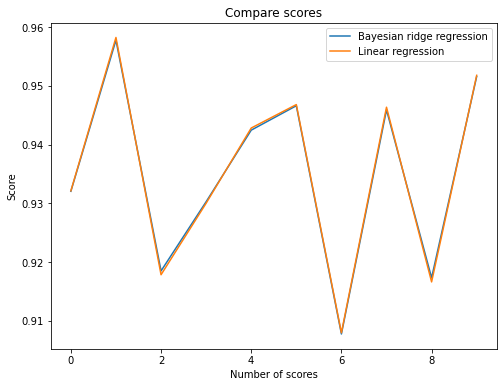

In [23]:
# Compare scores
def compare_regression_scores(bayesian_scores, lin_reg_scores):
    plt.figure(figsize=(8,6))
    plt.title('Compare scores')
    plt.plot(bayesian_scores, label='Bayesian ridge regression')
    plt.plot(lin_reg_scores, label='Linear regression')
    plt.xlabel('Number of scores')
    plt.ylabel('Score')
    plt.legend(loc='best', prop=dict(size=10))
    plt.show()
compare_regression_scores(bayesian_scores, lin_reg_scores)

The mean squared error is 0.26
Polynomial regression scores: [0.99332257 0.98212758 0.97179604 0.9860989  0.98665674 0.98040363
 0.97761519 0.97665717 0.9008692  0.92764632]
0.97 accuracy with a standard deviation of 0.03
The mean squared error is 0.26


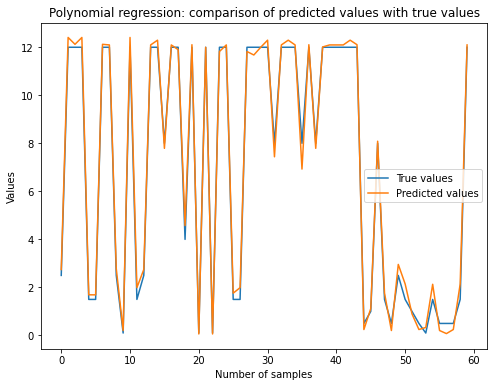

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Apply polynomial degree of 2 features to Linear Regression model
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

linear_regression_model.fit(X_poly, y)
y_poly_pred = linear_regression_model.predict(X_poly)

mse_score(y_poly_pred, y)
polynomial_regression_scores = cross_val_score(linear_regression_model, X_poly, y, cv=10)
print(f'Polynomial regression scores: {polynomial_regression_scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (polynomial_regression_scores.mean(), polynomial_regression_scores.std()))
mse_score(y_poly_pred, y)

plt.figure(figsize=(8,6))
plt.plot(y[:60], label='True values')
plt.plot(y_poly_pred[:60], label='Predicted values')
plt.xlabel('Number of samples')
plt.ylabel('Values')
plt.legend(prop=dict(size=10))
plt.title('Polynomial regression: comparison of predicted values with true values')
plt.show()

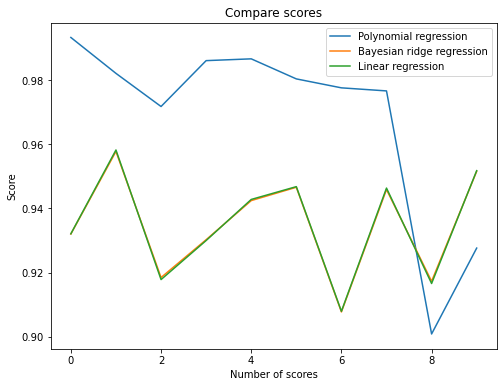

In [28]:
# Compare scores between 3 different model outputs
def compare_regression_scores(polynomial_regression_scores, bayesian_scores, lin_reg_scores):
    plt.figure(figsize=(8,6))
    plt.title('Compare scores')
    plt.plot(polynomial_regression_scores, label='Polynomial regression')
    plt.plot(bayesian_scores, label='Bayesian ridge regression')
    plt.plot(lin_reg_scores, label='Linear regression')
    plt.xlabel('Number of scores')
    plt.ylabel('Score')
    plt.legend(loc='best', prop=dict(size=10))
    plt.show()
compare_regression_scores(polynomial_regression_scores, bayesian_scores, lin_reg_scores)

In [27]:
# # Report scores
# with open('metrics.txt', 'w') as outfile:
#     outfile.write("Regression Metrics:\n")
#     outfile.write(f"{clf} training scores: %2.1f%%\n" % train_scores)
#     outfile.write(f"{clf} testing scores: %2.1f%%\n" % test_scores)
